In [1]:
import bs4

from bs4 import BeautifulSoup

import requests
import geocoder

In [2]:
import pandas as pd # for data processing
import folium   #for creating maps
import requests  #for retreiving Information from URL
from geopy.geocoders import Nominatim  #converting address to cordinates
from pandas.io.json import json_normalize #converting json to DataFrame 

In [3]:
# Send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Bangalore").text

In [4]:
data

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Category:Neighbourhoods in Bangalore - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"62f3b951-0ae1-4f8c-8620-2312cff37729","wgCSPNonce":false,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":14,"wgPageName":"Category:Neighbourhoods_in_Bangalore","wgTitle":"Neighbourhoods in Bangalore","wgCurRevisionId":796834779,"wgRevisionId":796834779,"wgArticleId":3838632,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Geography of Bangalore","Neighbourhoods in Karnataka"],"wgPageContentLanguage":"

In [5]:
# Parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [6]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Category:Neighbourhoods in Bangalore - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"62f3b951-0ae1-4f8c-8620-2312cff37729","wgCSPNonce":false,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":14,"wgPageName":"Category:Neighbourhoods_in_Bangalore","wgTitle":"Neighbourhoods in Bangalore","wgCurRevisionId":796834779,"wgRevisionId":796834779,"wgArticleId":3838632,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Geography of Bangalore","Neighbourhoods in Karnataka"],"wgPageContentLanguage":"en","

In [7]:
# Create a list to store neighbourhood data
neighborhoodList1 = []
# Append the data into the list
for row in soup.find_all("div class_"=="mw-category")[0].findAll("li"):
  neighborhoodList1.append(row.text)

In [8]:
neighborhoodList1

[' Ramamurthy Nagar\u200e (2 P)',
 'List of areas in Bangalore Cantonment',
 'List of areas in Bengaluru Pete',
 'List of neighbourhoods in Bangalore',
 'Adugodi',
 'Agara, Bangalore',
 'Anjanapura',
 'Arekere',
 'Austin Town',
 'Babusapalya',
 'Bagalur, Bangalore Urban',
 'Bahubalinagar',
 'Baiyyappanahalli',
 'Baiyyappanahalli Manavarthe Kaval',
 'Banashankari',
 'Banaswadi',
 'Basavanagudi',
 'Basaveshwaranagara',
 'Bellandur',
 'Bengaluru Pete',
 'Bharathnagar',
 'Bilekahalli',
 'Binnamangala Manavarthe Kaval',
 'Binnamangala, Bangalore',
 'Bommanahalli',
 'Bommasandra',
 'Brookefield',
 'BTM Layout',
 'Byatarayanapura',
 'Carmelaram',
 'Chamarajpet',
 'Chandapura',
 'Chickpet',
 'Chikkalasandra',
 'Cooke Town',
 'Cox Town, Bangalore',
 'CV Raman Nagar',
 'Dasarahalli',
 'Devara Jeevanahalli',
 'Devarachikkanahalli',
 'Dollars Colony',
 'Domlur',
 'Ejipura',
 'Electronic City',
 'Fraser Town, Bangalore',
 'G. M. Palya',
 'Gandhi Bazaar',
 'Gandhi Nagar, Bangalore',
 'Gangamma Circl

In [9]:
neighborhoodList1[4:145]

['Adugodi',
 'Agara, Bangalore',
 'Anjanapura',
 'Arekere',
 'Austin Town',
 'Babusapalya',
 'Bagalur, Bangalore Urban',
 'Bahubalinagar',
 'Baiyyappanahalli',
 'Baiyyappanahalli Manavarthe Kaval',
 'Banashankari',
 'Banaswadi',
 'Basavanagudi',
 'Basaveshwaranagara',
 'Bellandur',
 'Bengaluru Pete',
 'Bharathnagar',
 'Bilekahalli',
 'Binnamangala Manavarthe Kaval',
 'Binnamangala, Bangalore',
 'Bommanahalli',
 'Bommasandra',
 'Brookefield',
 'BTM Layout',
 'Byatarayanapura',
 'Carmelaram',
 'Chamarajpet',
 'Chandapura',
 'Chickpet',
 'Chikkalasandra',
 'Cooke Town',
 'Cox Town, Bangalore',
 'CV Raman Nagar',
 'Dasarahalli',
 'Devara Jeevanahalli',
 'Devarachikkanahalli',
 'Dollars Colony',
 'Domlur',
 'Ejipura',
 'Electronic City',
 'Fraser Town, Bangalore',
 'G. M. Palya',
 'Gandhi Bazaar',
 'Gandhi Nagar, Bangalore',
 'Gangamma Circle',
 'Ganganagar, Bangalore',
 'Garudacharpalya',
 'Girinagar',
 'Gottigere',
 'Gowdanapalya',
 'Hanumanthanagar, Bengaluru',
 'Hebbagodi',
 'Hebbal, Ba

In [10]:
neighborhoodList=neighborhoodList1[4:145]

In [11]:
# Create a new DataFrame from the list
kl_df = pd.DataFrame({"Neighborhood": neighborhoodList})
kl_df

,Neighborhood
0,Adugodi
1,"Agara, Bangalore"
2,Anjanapura
3,Arekere
4,Austin Town
...,...
136,"Whitefield, Bangalore"
137,Wilson Garden
138,Yelachenahalli
139,Yelahanka


In [12]:
 g = geocoder.arcgis('Adugodi, Bangalore, India')

In [13]:
g

<[OK] Arcgis - Geocode [Adugodi, Bangalore, Bengaluru, Karnataka]>

In [14]:
g.latlng


[12.944010000000048, 77.60797000000008]

In [15]:
# Defining a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bangalore, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [16]:
# Call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in kl_df["Neighborhood"].tolist()]

In [17]:
coords

[[12.944010000000048, 77.60797000000008],
 [12.84292000000005, 77.48582000000005],
 [12.858110000000067, 77.55910000000006],
 [12.885670000000061, 77.59673000000004],
 [12.963480000000061, 77.61297000000008],
 [13.027180000000044, 77.65038000000004],
 [13.077026195773577, 77.66150998621276],
 [13.044710000000066, 77.55008000000004],
 [12.98929000000004, 77.65111000000007],
 [12.98929000000004, 77.65111000000007],
 [12.922310000000039, 77.56988000000007],
 [13.019264919035423, 77.6556029157363],
 [12.938980000000072, 77.57137000000006],
 [12.986740000000054, 77.54389000000003],
 [12.927340000000072, 77.67169000000007],
 [12.966180000000065, 77.58690000000007],
 [13.083010000000058, 77.54779000000008],
 [12.90008000000006, 77.60432000000003],
 [13.015990000000045, 77.61046000000005],
 [12.978670000000022, 77.64078000000006],
 [12.90307000000007, 77.62445000000008],
 [12.817510000000027, 77.67881000000006],
 [12.993330000000071, 77.66123000000005],
 [12.914950000000033, 77.60999000000004]

In [18]:
pd.DataFrame(coords)

,0,1
0,12.94401,77.60797
1,12.84292,77.48582
2,12.85811,77.55910
3,12.88567,77.59673
4,12.96348,77.61297
...,...,...
136,12.97932,77.73370
137,12.94967,77.59675
138,12.90044,77.56865
139,13.09931,77.59259


In [19]:
# Create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [20]:
df_coords

,Latitude,Longitude
0,12.94401,77.60797
1,12.84292,77.48582
2,12.85811,77.55910
3,12.88567,77.59673
4,12.96348,77.61297
...,...,...
136,12.97932,77.73370
137,12.94967,77.59675
138,12.90044,77.56865
139,13.09931,77.59259


In [21]:
# Merge the coordinates into the original dataframe
kl_df['Latitude'] = df_coords['Latitude']
kl_df['Longitude'] = df_coords['Longitude']
print(kl_df.shape)
kl_df

(141, 3)


,Neighborhood,Latitude,Longitude
0,Adugodi,12.94401,77.60797
1,"Agara, Bangalore",12.84292,77.48582
2,Anjanapura,12.85811,77.55910
3,Arekere,12.88567,77.59673
4,Austin Town,12.96348,77.61297
...,...,...,...
136,"Whitefield, Bangalore",12.97932,77.73370
137,Wilson Garden,12.94967,77.59675
138,Yelachenahalli,12.90044,77.56865
139,Yelahanka,13.09931,77.59259


In [22]:
# Getting the coordinates of Bangalore
address = 'Bangalore, India'
geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore, India 12.9767936, 77.590082.


In [23]:
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

In [24]:
map_kl

In [25]:
for lat, lng, neighborhood in zip(kl_df['Latitude'],  kl_df['Longitude'], kl_df['Neighborhood']):
    print(lat,lng,neighborhood)

12.944010000000048 77.60797000000008 Adugodi
12.84292000000005 77.48582000000005 Agara, Bangalore
12.858110000000067 77.55910000000006 Anjanapura
12.885670000000061 77.59673000000004 Arekere
12.963480000000061 77.61297000000008 Austin Town
13.027180000000044 77.65038000000004 Babusapalya
13.077026195773577 77.66150998621276 Bagalur, Bangalore Urban
13.044710000000066 77.55008000000004 Bahubalinagar
12.98929000000004 77.65111000000007 Baiyyappanahalli
12.98929000000004 77.65111000000007 Baiyyappanahalli Manavarthe Kaval
12.922310000000039 77.56988000000007 Banashankari
13.019264919035423 77.6556029157363 Banaswadi
12.938980000000072 77.57137000000006 Basavanagudi
12.986740000000054 77.54389000000003 Basaveshwaranagara
12.927340000000072 77.67169000000007 Bellandur
12.966180000000065 77.58690000000007 Bengaluru Pete
13.083010000000058 77.54779000000008 Bharathnagar
12.90008000000006 77.60432000000003 Bilekahalli
13.015990000000045 77.61046000000005 Binnamangala Manavarthe Kaval
12.978670

In [26]:
folium.Popup("Adugodi", parse_html=True)

In [27]:
# Adding markers to map
for lat, lng, neighborhood in zip(kl_df['Latitude'],  kl_df['Longitude'], kl_df['Neighborhood']):
 label = '{}'.format(neighborhood)
 label = folium.Popup(label, parse_html=True)
 folium.CircleMarker([lat, lng],radius=5,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7).add_to(map_kl)
map_kl

In [28]:
import requests

url = "https://api.foursquare.com/v3/places/search?ll=13.133521%2C77.567135&radius=50000&limit=50"

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3VGvVy4Aneu4L4CT4BXkYuO/hMCjitQXUQUzAcfnYJrw="
}

response = requests.get(url, headers=headers)

output=response.text
print(response.text)

{"results":[{"fsq_id":"5124b4cbe4b0047c5ad8902a","categories":[{"id":13040,"name":"Dessert Shop","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/dessert_","suffix":".png"}}],"chains":[],"distance":4745,"geocodes":{"main":{"latitude":13.093356,"longitude":77.582586},"roof":{"latitude":13.093356,"longitude":77.582586}},"link":"/v3/places/5124b4cbe4b0047c5ad8902a","location":{"address":"293 Smk Complex","country":"IN","cross_street":"1st Main Road,chikkanommasandra Circle","formatted_address":"293 Smk Complex (1st Main Road,chikkanommasandra Circle), 560064, Karnātaka","postcode":"560064","region":"Karnātaka"},"name":"Kanti Sweets","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"54cf2060498e7db4b0f114ab","categories":[{"id":17119,"name":"Bicycle Store","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_","suffix":".png"}}],"chains":[],"distance":8070,"geocodes":{"main":{"latitude":13.168582,"longitude":77.632363}},"link":"/v3/places/54cf2060498

In [29]:
response

<Response [200]>

In [30]:
import json

In [31]:
jobj=json.loads(output)
final=json.dumps(jobj,indent=1 )

In [32]:
print(final)

{
 "results": [
  {
   "fsq_id": "5124b4cbe4b0047c5ad8902a",
   "categories": [
    {
     "id": 13040,
     "name": "Dessert Shop",
     "icon": {
      "prefix": "https://ss3.4sqi.net/img/categories_v2/food/dessert_",
      "suffix": ".png"
     }
    }
   ],
   "chains": [],
   "distance": 4745,
   "geocodes": {
    "main": {
     "latitude": 13.093356,
     "longitude": 77.582586
    },
    "roof": {
     "latitude": 13.093356,
     "longitude": 77.582586
    }
   },
   "link": "/v3/places/5124b4cbe4b0047c5ad8902a",
   "location": {
    "address": "293 Smk Complex",
    "country": "IN",
    "cross_street": "1st Main Road,chikkanommasandra Circle",
    "formatted_address": "293 Smk Complex (1st Main Road,chikkanommasandra Circle), 560064, Karn\u0101taka",
    "postcode": "560064",
    "region": "Karn\u0101taka"
   },
   "name": "Kanti Sweets",
   "related_places": {},
   "timezone": "Asia/Kolkata"
  },
  {
   "fsq_id": "54cf2060498e7db4b0f114ab",
   "categories": [
    {
     "id": 

In [33]:
len(jobj["results"])

50

In [34]:
for i in range(len(jobj["results"])):
    print(jobj["results"][i])

{'fsq_id': '5124b4cbe4b0047c5ad8902a', 'categories': [{'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}], 'chains': [], 'distance': 4745, 'geocodes': {'main': {'latitude': 13.093356, 'longitude': 77.582586}, 'roof': {'latitude': 13.093356, 'longitude': 77.582586}}, 'link': '/v3/places/5124b4cbe4b0047c5ad8902a', 'location': {'address': '293 Smk Complex', 'country': 'IN', 'cross_street': '1st Main Road,chikkanommasandra Circle', 'formatted_address': '293 Smk Complex (1st Main Road,chikkanommasandra Circle), 560064, Karnātaka', 'postcode': '560064', 'region': 'Karnātaka'}, 'name': 'Kanti Sweets', 'related_places': {}, 'timezone': 'Asia/Kolkata'}
{'fsq_id': '54cf2060498e7db4b0f114ab', 'categories': [{'id': 17119, 'name': 'Bicycle Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 8070, 'geocodes': {'main': {'latitude': 13.168582,

In [35]:
jobj["results"][5]

{'fsq_id': '511109d1e4b06ce8e794f039',
 'categories': [{'id': 13035,
   'name': 'Coffee Shop',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 11494,
 'geocodes': {'main': {'latitude': 13.065033, 'longitude': 77.646501}},
 'link': '/v3/places/511109d1e4b06ce8e794f039',
 'location': {'address': '103 Narayanapura Main Road, Kothanur, Nagavara',
  'country': 'IN',
  'cross_street': '',
  'formatted_address': '103 Narayanapura Main Road, Kothanur, Nagavara, Bangalore 560045, Karnataka',
  'locality': 'Bangalore',
  'neighborhood': ['Nagavara'],
  'postcode': '560045',
  'region': 'Karnataka'},
 'name': 'Hill Station Cafe',
 'related_places': {},
 'timezone': 'Asia/Kolkata'}

In [36]:
jobj["results"][2]["location"]["neighborhood"]

['Sahakara Nagar']

In [37]:
for i in range(len(jobj["results"])):
    print(jobj["results"][i]["name"])

Kanti Sweets
Decathlon
Big Straw
Kanti Sweets
Mezzaluna
Hill Station Cafe
Ice N Spice by truffles
Byg Brewski
Corner House
Orion Mall
Chat Street
PVR Gold Class, Orion
PVR bluO
Central Orion Mall
The Persian Terrace @ Sheraton Bridgade Gateway
Asha Sweet Center
PVR Cinemas
Toscano
Sri Sagar (formerly Central Tiffin Room)
Pebble
OG Variar and Sons Bakery
Veena Stores
Hotel Janatha
Corner House
Millers 46
Infinitea
Truffles
OG Vanar and Sons Bakery
Corner House
Richard's Park
Arirang Restaurant
Ujwal Bar and Restaurant
Sri Raghavendra Stores
Corner House
Anbu jawahar photography
Chichaba's Taj
Al Amanah
Natural Ice Cream
Swensen's
Windmills Craftswork
Volkswagen Palace Cross
Iyer Mess
New Krishna Bhavan
Cubbon Park
The Raj Pavilion
Hard Rock Cafe
Masala Klub
Chinnaswamy Stadium
Cafe 77 East
Fishland


In [38]:
for i in range(len(jobj["results"])):
    print(jobj["results"][i]["geocodes"])

{'main': {'latitude': 13.093356, 'longitude': 77.582586}, 'roof': {'latitude': 13.093356, 'longitude': 77.582586}}
{'main': {'latitude': 13.168582, 'longitude': 77.632363}}
{'main': {'latitude': 13.063497, 'longitude': 77.591274}, 'roof': {'latitude': 13.063497, 'longitude': 77.591274}}
{'main': {'latitude': 13.038974, 'longitude': 77.564234}, 'roof': {'latitude': 13.038974, 'longitude': 77.564234}}
{'main': {'latitude': 13.042207, 'longitude': 77.554747}, 'roof': {'latitude': 13.042207, 'longitude': 77.554747}}
{'main': {'latitude': 13.065033, 'longitude': 77.646501}}
{'main': {'latitude': 13.028196, 'longitude': 77.573153}, 'roof': {'latitude': 13.028196, 'longitude': 77.573153}}
{'main': {'latitude': 13.070819, 'longitude': 77.652451}}
{'main': {'latitude': 13.027935, 'longitude': 77.572928}, 'roof': {'latitude': 13.027935, 'longitude': 77.572928}}
{'main': {'latitude': 13.011306, 'longitude': 77.554906}}
{'main': {'latitude': 13.034381, 'longitude': 77.576082}, 'roof': {'latitude':

In [39]:
for i in range(len(jobj["results"])):
    print(jobj["results"][i]["geocodes"]["main"]["latitude"])

13.093356
13.168582
13.063497
13.038974
13.042207
13.065033
13.028196
13.070819
13.027935
13.011306
13.034381
13.010956
13.011262
13.011022
13.012308
12.999413
13.010717
13.008006
12.998219
13.005107
12.991439
13.005744
12.999348
12.988728
12.991552
12.9871
13.022423
12.987463
13.021018
13.004542
13.019531
12.992401
13.000875
13.004914
12.995687
13.000245
13.015661
12.985326
12.991759
13.199913
12.997426
12.998937
12.993065
12.977173
12.994088
12.976127
12.98519
12.978861
13.19703
12.975375


In [40]:
for i in range(len(jobj["results"])):
    print(jobj["results"][i]["categories"][0])

{'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}
{'id': 17119, 'name': 'Bicycle Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_', 'suffix': '.png'}}
{'id': 13027, 'name': 'Bistro', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}
{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}
{'id': 13236, 'name': 'Italian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}}
{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}
{'id': 13031, 'name': 'Burger Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}}
{'id': 13029, 'name': 'Brewery', 'icon': {'prefix': 'https://ss3.4sq

In [41]:
for i in range(len(jobj["results"])):
   print(jobj["results"][i]["categories"][0]["name"])

Dessert Shop
Bicycle Store
Bistro
Indian Restaurant
Italian Restaurant
Coffee Shop
Burger Joint
Brewery
Ice Cream Parlor
Shopping Mall
Fast Food Restaurant
Movie Theater
Bowling Alley
Retail
Lounge
Snack Place
Movie Theater
Italian Restaurant
Indian Restaurant
Night Club
Bakery
Fast Food Restaurant
Indian Restaurant
Ice Cream Parlor
Fast Food Restaurant
Restaurant
Restaurant
Bakery
Ice Cream Parlor
Park
Korean Restaurant
Indian Restaurant
Indian Restaurant
Ice Cream Parlor
Business and Professional Services
Mughlai Restaurant
Café
Ice Cream Parlor
Ice Cream Parlor
Brewery
Car Dealership
Indian Restaurant
Indian Restaurant
Park
Indian Restaurant
Bar
Indian Restaurant
Cricket Ground
Indian Restaurant
North Indian Restaurant


In [42]:
jobj["results"][0]["location"]["cross_street"]

'1st Main Road,chikkanommasandra Circle'

In [55]:
jobj["results"][4]["location"]["neighborhood"]

['Mathikere']

In [56]:
jobj["results"][4] 

{'fsq_id': '4f734b06e4b0601c70d3a30f',
 'categories': [{'id': 13236,
   'name': 'Italian Restaurant',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 10221,
 'geocodes': {'main': {'latitude': 13.042207, 'longitude': 77.554747},
  'roof': {'latitude': 13.042207, 'longitude': 77.554747}},
 'link': '/v3/places/4f734b06e4b0601c70d3a30f',
 'location': {'address': 'Movenpick Hotel .And Spa, 115, Gokula Extension, Hmt Road',
  'country': 'IN',
  'cross_street': '',
  'formatted_address': 'Movenpick Hotel .And Spa, 115, Gokula Extension, Hmt Road, Bangalore 560013, Karnātaka',
  'locality': 'Bangalore',
  'neighborhood': ['Mathikere'],
  'postcode': '560013',
  'region': 'Karnātaka'},
 'name': 'Mezzaluna',
 'related_places': {},
 'timezone': 'Asia/Kolkata'}

In [75]:
neighborhood_list=[]

In [76]:
for i in range(len(jobj["results"])):
    if "neighborhood" in jobj["results"][i]["location"]:
         neighborhood_list.append(jobj["results"][i]["location"]["neighborhood"][0])
    else:
        neighborhood_list.append("Nan")

In [77]:
neighborhood_list

['Nan',
 'Nan',
 'Sahakara Nagar',
 'Nan',
 'Mathikere',
 'Nagavara',
 'Nan',
 'Nan',
 'New BEL Road',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Rajaji Nagar',
 'Nan',
 'Malleshwaram',
 'Nan',
 'Nan',
 'Malleshwaram',
 'Sadashiva Nagar',
 'Rajaji Nagar',
 'Malleshwaram',
 'Malleshwaram',
 'Seshadripuram',
 'Vasanthnagar',
 'Vasant Nagar',
 'Kalyan Nagar',
 'Rajaji Nagar',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Malleswaram East',
 'Nan',
 'Nan',
 'Kalyan Nagar',
 'Kammanahalli Main Road',
 'Nan',
 'Nan',
 'Nan',
 'Jayamahal',
 'Malleswaram East',
 'Nan',
 'Gandhi Nagar',
 'Vasant Nagar',
 'Shanthala Nagar',
 'Race Course Road',
 'MG Road',
 'Devanahalli',
 'Gandhinagar']

In [78]:
cs_list=[]
for i in range(len(jobj["results"])):
    if "cross_street" in jobj["results"][i]["location"]:
         cs_list.append(jobj["results"][i]["location"]["cross_street"])
    else:
        cs_list.append("Nan")

In [79]:
cs_list

['1st Main Road,chikkanommasandra Circle',
 '',
 'Sahakar Nagar Main Road',
 'New BEL Road',
 '',
 '',
 '80 Feet Road',
 'Visthar',
 '80 Feet Road',
 'Dr. Rajkumar Rd, Rajajinagar',
 '',
 '',
 'Rajajinagar',
 '',
 '',
 '',
 '26/1, Dr.Rajkumar Road, Rajaji Nagar',
 '',
 'Margosa Road, Malleshwaram',
 'Near Palace Grounds',
 '',
 '15th Cross, Malleshwaram',
 'Malleshwaram',
 'Near Sheshadripuram College',
 'Nan',
 'Vasanth Nagar',
 '',
 '5th Block , Rajajinagar',
 'Kammanahalli',
 '',
 '',
 '',
 '2nd Cross Margosa Road',
 'Opp. Holy Ghost Church',
 '1st Cross, Cox Town,',
 '',
 '',
 '',
 'Sampige Road, Malleshwaram',
 '',
 '',
 'Nan',
 'Nan',
 'Nan',
 '',
 'St. Marks Rd',
 '',
 'Nan',
 '',
 '1st Main Gandhinagar']

In [89]:
neigh_df=pd.DataFrame()

In [90]:
neigh_df["neighborhood"]=neighborhood_list
neigh_df["cross_street"]=cs_list

In [91]:
neigh_df

,neighborhood,cross_street
0,Nan,"1st Main Road,chikkanommasandra Circle"
1,Nan,
2,Sahakara Nagar,Sahakar Nagar Main Road
3,Nan,New BEL Road
4,Mathikere,
5,Nagavara,
6,Nan,80 Feet Road
7,Nan,Visthar
8,New BEL Road,80 Feet Road
9,Nan,"Dr. Rajkumar Rd, Rajajinagar"


In [82]:
places=[]

In [45]:
for i in range(len(jobj["results"])):
       places.append((jobj["results"][i]["name"],jobj["results"][i]["geocodes"]["main"]["latitude"],jobj["results"][i]["geocodes"]["main"]["longitude"],jobj["results"][i]["categories"][0]["name"]))

In [46]:
places

[('Kanti Sweets', 13.093356, 77.582586, 'Dessert Shop'),
 ('Decathlon', 13.168582, 77.632363, 'Bicycle Store'),
 ('Big Straw', 13.063497, 77.591274, 'Bistro'),
 ('Kanti Sweets', 13.038974, 77.564234, 'Indian Restaurant'),
 ('Mezzaluna', 13.042207, 77.554747, 'Italian Restaurant'),
 ('Hill Station Cafe', 13.065033, 77.646501, 'Coffee Shop'),
 ('Ice N Spice by truffles', 13.028196, 77.573153, 'Burger Joint'),
 ('Byg Brewski', 13.070819, 77.652451, 'Brewery'),
 ('Corner House', 13.027935, 77.572928, 'Ice Cream Parlor'),
 ('Orion Mall', 13.011306, 77.554906, 'Shopping Mall'),
 ('Chat Street', 13.034381, 77.576082, 'Fast Food Restaurant'),
 ('PVR Gold Class, Orion', 13.010956, 77.555121, 'Movie Theater'),
 ('PVR bluO', 13.011262, 77.555126, 'Bowling Alley'),
 ('Central Orion Mall', 13.011022, 77.554963, 'Retail'),
 ('The Persian Terrace @ Sheraton Bridgade Gateway',
  13.012308,
  77.55534,
  'Lounge'),
 ('Asha Sweet Center', 12.999413, 77.571222, 'Snack Place'),
 ('PVR Cinemas', 13.010717,

In [47]:
places_df=pd.DataFrame(places)

In [48]:
places_df.columns=["places_name","latitude","longitude","category"]

In [49]:
places_df

,places_name,latitude,longitude,category
0,Kanti Sweets,13.093356,77.582586,Dessert Shop
1,Decathlon,13.168582,77.632363,Bicycle Store
2,Big Straw,13.063497,77.591274,Bistro
3,Kanti Sweets,13.038974,77.564234,Indian Restaurant
4,Mezzaluna,13.042207,77.554747,Italian Restaurant
5,Hill Station Cafe,13.065033,77.646501,Coffee Shop
6,Ice N Spice by truffles,13.028196,77.573153,Burger Joint
7,Byg Brewski,13.070819,77.652451,Brewery
8,Corner House,13.027935,77.572928,Ice Cream Parlor
9,Orion Mall,13.011306,77.554906,Shopping Mall


In [50]:

# import module
from geopy.geocoders import Nominatim

In [51]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [57]:
# Latitude & Longitude input
Latitude = "13.042207"
Longitude = "77.554747"
 
location = geolocator.reverse(Latitude+","+Longitude)

In [58]:
print(location)

Gokulam Grand Hotel & Spa, 115, Pipeline Road, Gokula, J P Park Ward, Rajarajeshwari Nagar Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560054, India


In [97]:
address = location.raw["address"]
print(address)

{'tourism': 'Gokulam Grand Hotel & Spa', 'house_number': '115', 'road': 'Pipeline Road', 'suburb': 'Gokula', 'city_district': 'Rajarajeshwari Nagar Zone', 'city': 'Bengaluru', 'county': 'Bangalore North', 'state_district': 'Bangalore Urban', 'state': 'Karnataka', 'ISO3166-2-lvl4': 'IN-KA', 'postcode': '560054', 'country': 'India', 'country_code': 'in'}


In [95]:
address["city_district"]

'Rajarajeshwari Nagar Zone'

In [119]:
city_dis=[]

In [120]:
for i in range(len(jobj["results"])):
    Latitude =str( places_df["latitude"][i])
    Longitude = str(places_df["longitude"][i])
#     print(Latitude,Longitude) 
    location = geolocator.reverse(Latitude+","+Longitude)
    address = location.raw['address']
    city_dis.append(address)
    
    

In [141]:
city_dis[48]

{'tourism': 'Taj Bangalore',
 'road': 'Bangalore International Airport Road',
 'county': 'Devanahalli taluk',
 'state_district': 'Bangalore Rural',
 'state': 'Karnataka',
 'ISO3166-2-lvl4': 'IN-KA',
 'postcode': '560300',
 'country': 'India',
 'country_code': 'in'}

In [122]:
len(city_dis)

50

In [123]:
g_neighbourhood=[]
for i in range(len(jobj["results"])):
    if "neighbourhood" in city_dis[i]:
         g_neighbourhood.append(city_dis[i]["neighbourhood"])
    else:
        g_neighbourhood.append("Nan")

In [124]:
g_neighbourhood

['Nan',
 'Nan',
 'Byatarayanapura',
 'Jaladarshini Layout',
 'Nan',
 'K Narayanapura',
 'Nan',
 'Byrathi',
 'Nan',
 'Nan',
 'Postal Colony',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Rajajinagara 1st R Blockಟ್',
 'Nan',
 'Nan',
 'Rajaji Nagar 3rd Block',
 'Nan',
 'Nan',
 'Nan',
 'Kaverappa Layout',
 'Nan',
 'Nan',
 'Shivanahalli',
 'Kacharakanahalli',
 'Richards Town',
 'Kacharakanahalli',
 'Kaverappa Layout',
 'Nan',
 'Richards Town',
 'Nan',
 'Sindhi Colony',
 'Nan',
 'Rajajinagar 6th Block',
 'Nan',
 'Nan',
 'Chakravarty Layout',
 'Nan',
 'Nan',
 'Nan',
 'Chakravarty Layout',
 'Shantala Nagar',
 'Fair Field Layout',
 'Shantala Nagar',
 'Nan',
 'Nan']

In [125]:
suburb_list=[]
for i in range(len(city_dis)):
    if "suburb" in city_dis[i]:
         suburb_list.append(city_dis[i]["suburb"])
    else:
        suburb_list.append("Nan")

In [126]:
suburb_list

['Yelahanka New Town',
 'Nan',
 'Byatarayanapura',
 'Mattikere Ward',
 'Gokula',
 'Horamavu',
 'Ganga Nagar Ward',
 'Hudi',
 'Aramane Nagara Ward',
 'Subrahmanya Nagar',
 'Sanjaya Nagar Ward',
 'Subrahmanya Nagar',
 'Subrahmanya Nagar',
 'Subrahmanya Nagar',
 'Subrahmanya Nagar',
 'Seshadripuram',
 'Subrahmanya Nagar',
 'Nagapura Ward',
 'Seshadripuram',
 'Sadhashivanagar',
 'Rajaji Nagar Ward',
 'Malleswaram',
 'Seshadripuram',
 'Gandhinagar',
 'Vasanth Nagar',
 'Sampangiram Nagar Ward',
 'Kalyan Nagar',
 'Shivanagara',
 'Banasavadi',
 'Sagayarapuram Ward',
 'Kacharkanahalli',
 'Vasanth Nagar',
 'Malleswaram',
 'Sagayarapuram Ward',
 'Cox Town',
 'Pulikeshinagar',
 'Kalyan Nagar',
 'Dr. Raj Kumar Ward',
 'Subhash Nagar',
 'Nan',
 'Vasanth Nagar',
 'Malleswaram',
 'Subhash Nagar',
 'Sampangiram Nagar Ward',
 'Vasanth Nagar',
 'Shantala Nagar',
 'Vasanth Nagar',
 'Shantala Nagar',
 'Nan',
 'Gandhinagar']

In [132]:
village_list=[]
for i in range(len(city_dis)):
    if "village" in city_dis[i]:
         village_list.append(city_dis[i]["village"])
    else:
        village_list.append("Nan")

In [133]:
village_list

['Nan',
 'Chikkajala',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Yartiganahalli',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan']

In [134]:
rough=pd.DataFrame()
rough["neighborhood"]=g_neighbourhood
rough["suburb"]=suburb_list

rough["village"]=village_list

In [310]:

rough

,neighborhood,suburb,village
0,Nan,Yelahanka New Town,Nan
1,Nan,Chikkajala,Chikkajala
2,Byatarayanapura,Byatarayanapura,Nan
3,Jaladarshini Layout,Mattikere Ward,Nan
4,Nan,Gokula,Nan
5,K Narayanapura,Horamavu,Nan
6,Nan,Ganga Nagar Ward,Nan
7,Byrathi,Hudi,Nan
8,Nan,Aramane Nagara Ward,Nan
9,Nan,Subrahmanya Nagar,Nan


In [137]:
 rough["suburb"][2]

'Byatarayanapura'

In [138]:
for i in range(50):
    if rough["suburb"][i] == "Nan":
        rough["suburb"][i]=rough["village"][i]
        

In [139]:
rough

,neighborhood,suburb,village
0,Nan,Yelahanka New Town,Nan
1,Nan,Chikkajala,Chikkajala
2,Byatarayanapura,Byatarayanapura,Nan
3,Jaladarshini Layout,Mattikere Ward,Nan
4,Nan,Gokula,Nan
5,K Narayanapura,Horamavu,Nan
6,Nan,Ganga Nagar Ward,Nan
7,Byrathi,Hudi,Nan
8,Nan,Aramane Nagara Ward,Nan
9,Nan,Subrahmanya Nagar,Nan


In [142]:
rough["suburb"][48]="Devanahalli taluk"

In [143]:
rough

,neighborhood,suburb,village
0,Nan,Yelahanka New Town,Nan
1,Nan,Chikkajala,Chikkajala
2,Byatarayanapura,Byatarayanapura,Nan
3,Jaladarshini Layout,Mattikere Ward,Nan
4,Nan,Gokula,Nan
5,K Narayanapura,Horamavu,Nan
6,Nan,Ganga Nagar Ward,Nan
7,Byrathi,Hudi,Nan
8,Nan,Aramane Nagara Ward,Nan
9,Nan,Subrahmanya Nagar,Nan


In [144]:
# Defining a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bangalore, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [149]:
# Call the function to get the coordinates, store in a new list using list comprehension
coords1 = [ get_latlng(neighborhood) for neighborhood in rough["suburb"].tolist()]

In [150]:
coords1

[[13.10212000000007, 77.57687000000004],
 [13.168000000000063, 77.63411000000008],
 [12.951940000000036, 77.54445000000004],
 [13.032340000000033, 77.55864000000008],
 [13.04069000000004, 77.55726000000004],
 [13.038700000000063, 77.66192000000007],
 [13.014450000000068, 77.58808000000005],
 [12.994500000000073, 77.71830000000006],
 [12.966180000000065, 77.58690000000007],
 [13.008910000000071, 77.55519000000004],
 [13.02518023126911, 77.53603256792182],
 [13.008910000000071, 77.55519000000004],
 [13.008910000000071, 77.55519000000004],
 [13.008910000000071, 77.55519000000004],
 [13.008910000000071, 77.55519000000004],
 [12.993550000000027, 77.57988000000006],
 [13.008910000000071, 77.55519000000004],
 [12.999500000000069, 77.54206000000005],
 [12.993550000000027, 77.57988000000006],
 [13.014830000000075, 77.57771000000008],
 [13.005440000000021, 77.55693000000008],
 [13.00632005596653, 77.56839983128529],
 [12.993550000000027, 77.57988000000006],
 [13.026430000000062, 77.6175100000000

In [151]:
places_df

,places_name,latitude,longitude,category
0,Kanti Sweets,13.093356,77.582586,Dessert Shop
1,Decathlon,13.168582,77.632363,Bicycle Store
2,Big Straw,13.063497,77.591274,Bistro
3,Kanti Sweets,13.038974,77.564234,Indian Restaurant
4,Mezzaluna,13.042207,77.554747,Italian Restaurant
5,Hill Station Cafe,13.065033,77.646501,Coffee Shop
6,Ice N Spice by truffles,13.028196,77.573153,Burger Joint
7,Byg Brewski,13.070819,77.652451,Brewery
8,Corner House,13.027935,77.572928,Ice Cream Parlor
9,Orion Mall,13.011306,77.554906,Shopping Mall


In [154]:
e_neigh=pd.DataFrame(coords1,columns=['Latitude', 'Longitude'])
e_neigh["neighborhood"]=rough["suburb"]

In [155]:
e_neigh

,Latitude,Longitude,neighborhood
0,13.102120,77.576870,Yelahanka New Town
1,13.168000,77.634110,Chikkajala
2,12.951940,77.544450,Byatarayanapura
3,13.032340,77.558640,Mattikere Ward
4,13.040690,77.557260,Gokula
5,13.038700,77.661920,Horamavu
6,13.014450,77.588080,Ganga Nagar Ward
7,12.994500,77.718300,Hudi
8,12.966180,77.586900,Aramane Nagara Ward
9,13.008910,77.555190,Subrahmanya Nagar


In [156]:
final_df=pd.concat([e_neigh,places_df],axis=1)

In [157]:
final_df

,Latitude,Longitude,neighborhood,places_name,latitude,longitude,category
0,13.102120,77.576870,Yelahanka New Town,Kanti Sweets,13.093356,77.582586,Dessert Shop
1,13.168000,77.634110,Chikkajala,Decathlon,13.168582,77.632363,Bicycle Store
2,12.951940,77.544450,Byatarayanapura,Big Straw,13.063497,77.591274,Bistro
3,13.032340,77.558640,Mattikere Ward,Kanti Sweets,13.038974,77.564234,Indian Restaurant
4,13.040690,77.557260,Gokula,Mezzaluna,13.042207,77.554747,Italian Restaurant
5,13.038700,77.661920,Horamavu,Hill Station Cafe,13.065033,77.646501,Coffee Shop
6,13.014450,77.588080,Ganga Nagar Ward,Ice N Spice by truffles,13.028196,77.573153,Burger Joint
7,12.994500,77.718300,Hudi,Byg Brewski,13.070819,77.652451,Brewery
8,12.966180,77.586900,Aramane Nagara Ward,Corner House,13.027935,77.572928,Ice Cream Parlor
9,13.008910,77.555190,Subrahmanya Nagar,Orion Mall,13.011306,77.554906,Shopping Mall


In [177]:
final_df.groupby(["category"]).count()

,Latitude,Longitude,neighborhood,places_name,latitude,longitude
category,,,,,,
Bakery,2,2,2,2,2,2
Bar,1,1,1,1,1,1
Bicycle Store,1,1,1,1,1,1
Bistro,1,1,1,1,1,1
Bowling Alley,1,1,1,1,1,1
Brewery,2,2,2,2,2,2
Burger Joint,1,1,1,1,1,1
Business and Professional Services,1,1,1,1,1,1
Café,1,1,1,1,1,1


In [178]:
e_neigh.groupby(["neighborhood"]).count()

,Latitude,Longitude
neighborhood,,
Aramane Nagara Ward,1,1
Banasavadi,1,1
Byatarayanapura,1,1
Chikkajala,1,1
Cox Town,1,1
Devanahalli taluk,1,1
Dr. Raj Kumar Ward,1,1
Gandhinagar,2,2
Ganga Nagar Ward,1,1


In [179]:
# Lets check how many venues were returned for each neighbourhood
final_df.groupby(["neighborhood"])

In [180]:
final_df

,Latitude,Longitude,neighborhood,places_name,latitude,longitude,category
0,13.102120,77.576870,Yelahanka New Town,Kanti Sweets,13.093356,77.582586,Dessert Shop
1,13.168000,77.634110,Chikkajala,Decathlon,13.168582,77.632363,Bicycle Store
2,12.951940,77.544450,Byatarayanapura,Big Straw,13.063497,77.591274,Bistro
3,13.032340,77.558640,Mattikere Ward,Kanti Sweets,13.038974,77.564234,Indian Restaurant
4,13.040690,77.557260,Gokula,Mezzaluna,13.042207,77.554747,Italian Restaurant
5,13.038700,77.661920,Horamavu,Hill Station Cafe,13.065033,77.646501,Coffee Shop
6,13.014450,77.588080,Ganga Nagar Ward,Ice N Spice by truffles,13.028196,77.573153,Burger Joint
7,12.994500,77.718300,Hudi,Byg Brewski,13.070819,77.652451,Brewery
8,12.966180,77.586900,Aramane Nagara Ward,Corner House,13.027935,77.572928,Ice Cream Parlor
9,13.008910,77.555190,Subrahmanya Nagar,Orion Mall,13.011306,77.554906,Shopping Mall


In [159]:
# Lets check out how many unique categories can be curated from all the returned values
print('There are {} unique categories.'.format(len(final_df['category'].unique())))

There are 28 unique categories.


In [164]:

# Displaying the first 50 Venue Category names
final_df['category'].unique()[:]

array(['Dessert Shop', 'Bicycle Store', 'Bistro', 'Indian Restaurant',
       'Italian Restaurant', 'Coffee Shop', 'Burger Joint', 'Brewery',
       'Ice Cream Parlor', 'Shopping Mall', 'Fast Food Restaurant',
       'Movie Theater', 'Bowling Alley', 'Retail', 'Lounge',
       'Snack Place', 'Night Club', 'Bakery', 'Restaurant', 'Park',
       'Korean Restaurant', 'Business and Professional Services',
       'Mughlai Restaurant', 'Café', 'Car Dealership', 'Bar',
       'Cricket Ground', 'North Indian Restaurant'], dtype=object)

In [167]:
# One hot encoding
kl_onehot = pd.get_dummies(final_df[['category']], prefix="", prefix_sep="")

In [168]:
kl_onehot

,Bakery,Bar,Bicycle Store,Bistro,Bowling Alley,Brewery,Burger Joint,Business and Professional Services,Café,Car Dealership,...,Lounge,Movie Theater,Mughlai Restaurant,Night Club,North Indian Restaurant,Park,Restaurant,Retail,Shopping Mall,Snack Place
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [169]:
# Adding neighborhood column back to dataframe
kl_onehot['Neighborhoods'] = final_df['neighborhood']

In [170]:
kl_onehot

,Bakery,Bar,Bicycle Store,Bistro,Bowling Alley,Brewery,Burger Joint,Business and Professional Services,Café,Car Dealership,...,Movie Theater,Mughlai Restaurant,Night Club,North Indian Restaurant,Park,Restaurant,Retail,Shopping Mall,Snack Place,Neighborhoods
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yelahanka New Town
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chikkajala
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Byatarayanapura
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mattikere Ward
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gokula
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Horamavu
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Ganga Nagar Ward
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hudi
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aramane Nagara Ward
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Subrahmanya Nagar


In [171]:
# Moving neighbourhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

In [172]:
kl_onehot

,Neighborhoods,Bakery,Bar,Bicycle Store,Bistro,Bowling Alley,Brewery,Burger Joint,Business and Professional Services,Café,...,Lounge,Movie Theater,Mughlai Restaurant,Night Club,North Indian Restaurant,Park,Restaurant,Retail,Shopping Mall,Snack Place
0,Yelahanka New Town,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikkajala,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Byatarayanapura,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mattikere Ward,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gokula,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Horamavu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ganga Nagar Ward,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Hudi,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Aramane Nagara Ward,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Subrahmanya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [173]:
print(kl_onehot.shape)

(50, 29)


In [ ]:
g=[]
resta=[]
oth=[]
for i in range(0,50):
    g.append(df[i][0]['icon']['prefix'].find('food'))
co=0
for i in g:
    if i>1:
        co+=1
resta.append(co)
oth.append(len(g)-co)            

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

In [176]:
kl_grouped=kl_onehot.groupby(["Neighborhoods"]).sum().reset_index()
print(kl_grouped.shape)
kl_grouped

(31, 29)


,Neighborhoods,Bakery,Bar,Bicycle Store,Bistro,Bowling Alley,Brewery,Burger Joint,Business and Professional Services,Café,...,Lounge,Movie Theater,Mughlai Restaurant,Night Club,North Indian Restaurant,Park,Restaurant,Retail,Shopping Mall,Snack Place
0,Aramane Nagara Ward,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Banasavadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Byatarayanapura,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chikkajala,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cox Town,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Devanahalli taluk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Dr. Raj Kumar Ward,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Gandhinagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,Ganga Nagar Ward,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Gokula,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
kl_grouped.iloc[:,]

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
Name: Bistro, dtype: uint8

In [181]:
final_df['category'].unique()[:]

array(['Dessert Shop', 'Bicycle Store', 'Bistro', 'Indian Restaurant',
       'Italian Restaurant', 'Coffee Shop', 'Burger Joint', 'Brewery',
       'Ice Cream Parlor', 'Shopping Mall', 'Fast Food Restaurant',
       'Movie Theater', 'Bowling Alley', 'Retail', 'Lounge',
       'Snack Place', 'Night Club', 'Bakery', 'Restaurant', 'Park',
       'Korean Restaurant', 'Business and Professional Services',
       'Mughlai Restaurant', 'Café', 'Car Dealership', 'Bar',
       'Cricket Ground', 'North Indian Restaurant'], dtype=object)

In [189]:
restro=["Neighborhoods",'Dessert Shop',  'Bistro', 'Indian Restaurant',
       'Italian Restaurant', 'Coffee Shop', 'Burger Joint', 
       'Ice Cream Parlor',  'Fast Food Restaurant',
       'Snack Place',  'Bakery', 'Restaurant', 
       'Korean Restaurant', 
       'Mughlai Restaurant', 'Café',  'Bar',
        'North Indian Restaurant']

In [190]:
kl_grouped.loc[:,restro]

,Neighborhoods,Dessert Shop,Bistro,Indian Restaurant,Italian Restaurant,Coffee Shop,Burger Joint,Ice Cream Parlor,Fast Food Restaurant,Snack Place,Bakery,Restaurant,Korean Restaurant,Mughlai Restaurant,Café,Bar,North Indian Restaurant
0,Aramane Nagara Ward,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Banasavadi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Byatarayanapura,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chikkajala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cox Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Devanahalli taluk,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Dr. Raj Kumar Ward,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,Gandhinagar,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,Ganga Nagar Ward,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Gokula,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
kl_grouped.dtypes

Neighborhoods                         object
Bakery                                 uint8
Bar                                    uint8
Bicycle Store                          uint8
Bistro                                 uint8
Bowling Alley                          uint8
Brewery                                uint8
Burger Joint                           uint8
Business and Professional Services     uint8
Café                                   uint8
Car Dealership                         uint8
Coffee Shop                            uint8
Cricket Ground                         uint8
Dessert Shop                           uint8
Fast Food Restaurant                   uint8
Ice Cream Parlor                       uint8
Indian Restaurant                      uint8
Italian Restaurant                     uint8
Korean Restaurant                      uint8
Lounge                                 uint8
Movie Theater                          uint8
Mughlai Restaurant                     uint8
Night Club

In [232]:
wan_restro=['Dessert Shop',  'Bistro', 'Indian Restaurant',
       'Italian Restaurant', 'Coffee Shop', 'Burger Joint', 
       'Ice Cream Parlor',  'Fast Food Restaurant',
       'Snack Place',  'Bakery', 'Restaurant', 
       'Korean Restaurant', 
       'Mughlai Restaurant', 'Café',  'Bar',
        'North Indian Restaurant'] 

In [225]:
wanx

Dessert Shop               0
Bistro                     0
Indian Restaurant          0
Italian Restaurant         0
Coffee Shop                0
Burger Joint               0
Ice Cream Parlor           1
Fast Food Restaurant       0
Snack Place                0
Bakery                     0
Restaurant                 0
Korean Restaurant          0
Mughlai Restaurant         0
Café                       0
Bar                        0
North Indian Restaurant    0
Name: 1, dtype: int32

In [233]:
kl_grouped[wan_restro]

,Dessert Shop,Bistro,Indian Restaurant,Italian Restaurant,Coffee Shop,Burger Joint,Ice Cream Parlor,Fast Food Restaurant,Snack Place,Bakery,Restaurant,Korean Restaurant,Mughlai Restaurant,Café,Bar,North Indian Restaurant
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [236]:
kl_grouped["Neighborhoods"]

0        Aramane Nagara Ward
1                 Banasavadi
2            Byatarayanapura
3                 Chikkajala
4                   Cox Town
5          Devanahalli taluk
6         Dr. Raj Kumar Ward
7                Gandhinagar
8           Ganga Nagar Ward
9                     Gokula
10                  Horamavu
11                      Hudi
12           Kacharkanahalli
13              Kalyan Nagar
14               Malleswaram
15            Mattikere Ward
16             Nagapura Ward
17            Pulikeshinagar
18         Rajaji Nagar Ward
19           Sadhashivanagar
20        Sagayarapuram Ward
21    Sampangiram Nagar Ward
22        Sanjaya Nagar Ward
23             Seshadripuram
24            Shantala Nagar
25               Shivanagara
26             Subhash Nagar
27         Subrahmanya Nagar
28             Vasanth Nagar
29            Yartiganahalli
30        Yelahanka New Town
Name: Neighborhoods, dtype: object

In [234]:
group_restro=pd.DataFrame()

In [237]:
group_restro["Neighborhoods"]= kl_grouped["Neighborhoods"]

In [238]:
group_restro

,Neighborhoods
0,Aramane Nagara Ward
1,Banasavadi
2,Byatarayanapura
3,Chikkajala
4,Cox Town
5,Devanahalli taluk
6,Dr. Raj Kumar Ward
7,Gandhinagar
8,Ganga Nagar Ward
9,Gokula


In [239]:
group_restro[wan_restro]=kl_grouped[wan_restro].astype(int)

In [244]:
group_restro.dtypes

Neighborhoods              object
Dessert Shop                int32
Bistro                      int32
Indian Restaurant           int32
Italian Restaurant          int32
Coffee Shop                 int32
Burger Joint                int32
Ice Cream Parlor            int32
Fast Food Restaurant        int32
Snack Place                 int32
Bakery                      int32
Restaurant                  int32
Korean Restaurant           int32
Mughlai Restaurant          int32
Café                        int32
Bar                         int32
North Indian Restaurant     int32
dtype: object

In [250]:
group_restro.iloc[1,1:].sum()

1

In [252]:
len(group_restro)

31

In [253]:
total=[]
for i in range(len(group_restro)):
    total.append(group_restro.iloc[i,1:].sum())
    

In [254]:
total

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 0,
 4,
 0,
 1]

In [256]:
group_restro["Total"] = total

In [257]:
group_restro

,Neighborhoods,Dessert Shop,Bistro,Indian Restaurant,Italian Restaurant,Coffee Shop,Burger Joint,Ice Cream Parlor,Fast Food Restaurant,Snack Place,Bakery,Restaurant,Korean Restaurant,Mughlai Restaurant,Café,Bar,North Indian Restaurant,Total
0,Aramane Nagara Ward,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Banasavadi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Byatarayanapura,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Chikkajala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cox Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Devanahalli taluk,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Dr. Raj Kumar Ward,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,Gandhinagar,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2
8,Ganga Nagar Ward,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9,Gokula,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [258]:
group_restro.columns

Index(['Neighborhoods', 'Dessert Shop', 'Bistro', 'Indian Restaurant',
       'Italian Restaurant', 'Coffee Shop', 'Burger Joint', 'Ice Cream Parlor',
       'Fast Food Restaurant', 'Snack Place', 'Bakery', 'Restaurant',
       'Korean Restaurant', 'Mughlai Restaurant', 'Café', 'Bar',
       'North Indian Restaurant', 'Total'],
      dtype='object')

In [259]:
 others=['Bicycle Store', 'Brewery',
        'Shopping Mall',
       'Movie Theater', 'Bowling Alley', 'Retail', 'Lounge',
        'Night Club', 'Park',
        'Business and Professional Services',
        'Car Dealership', 
       'Cricket Ground']

In [260]:
group_others=pd.DataFrame()

In [261]:
group_others["Neighborhoods"]= kl_grouped["Neighborhoods"]

In [262]:
group_others

,Neighborhoods
0,Aramane Nagara Ward
1,Banasavadi
2,Byatarayanapura
3,Chikkajala
4,Cox Town
5,Devanahalli taluk
6,Dr. Raj Kumar Ward
7,Gandhinagar
8,Ganga Nagar Ward
9,Gokula


In [265]:
group_others[others]=kl_grouped[others].astype(int)

In [267]:
group_others

,Neighborhoods,Bicycle Store,Brewery,Shopping Mall,Movie Theater,Bowling Alley,Retail,Lounge,Night Club,Park,Business and Professional Services,Car Dealership,Cricket Ground
0,Aramane Nagara Ward,0,0,0,0,0,0,0,0,0,0,0,0
1,Banasavadi,0,0,0,0,0,0,0,0,0,0,0,0
2,Byatarayanapura,0,0,0,0,0,0,0,0,0,0,0,0
3,Chikkajala,1,0,0,0,0,0,0,0,0,0,0,0
4,Cox Town,0,0,0,0,0,0,0,0,0,1,0,0
5,Devanahalli taluk,0,0,0,0,0,0,0,0,0,0,0,0
6,Dr. Raj Kumar Ward,0,0,0,0,0,0,0,0,0,0,0,0
7,Gandhinagar,0,0,0,0,0,0,0,0,0,0,0,0
8,Ganga Nagar Ward,0,0,0,0,0,0,0,0,0,0,0,0
9,Gokula,0,0,0,0,0,0,0,0,0,0,0,0


In [268]:
total_others=[]
for i in range(len(group_others)):
    total_others.append(group_others.iloc[i,1:].sum())

In [269]:
total_others

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 6,
 1,
 1,
 0]

In [270]:
group_others["Total_others"] = total_others

In [271]:
group_others

,Neighborhoods,Bicycle Store,Brewery,Shopping Mall,Movie Theater,Bowling Alley,Retail,Lounge,Night Club,Park,Business and Professional Services,Car Dealership,Cricket Ground,Total_others
0,Aramane Nagara Ward,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Banasavadi,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Byatarayanapura,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chikkajala,1,0,0,0,0,0,0,0,0,0,0,0,1
4,Cox Town,0,0,0,0,0,0,0,0,0,1,0,0,1
5,Devanahalli taluk,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Dr. Raj Kumar Ward,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Gandhinagar,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Ganga Nagar Ward,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Gokula,0,0,0,0,0,0,0,0,0,0,0,0,0


In [272]:
group_restro

,Neighborhoods,Dessert Shop,Bistro,Indian Restaurant,Italian Restaurant,Coffee Shop,Burger Joint,Ice Cream Parlor,Fast Food Restaurant,Snack Place,Bakery,Restaurant,Korean Restaurant,Mughlai Restaurant,Café,Bar,North Indian Restaurant,Total
0,Aramane Nagara Ward,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Banasavadi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Byatarayanapura,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Chikkajala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cox Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Devanahalli taluk,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Dr. Raj Kumar Ward,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,Gandhinagar,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2
8,Ganga Nagar Ward,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9,Gokula,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [273]:
group_others

,Neighborhoods,Bicycle Store,Brewery,Shopping Mall,Movie Theater,Bowling Alley,Retail,Lounge,Night Club,Park,Business and Professional Services,Car Dealership,Cricket Ground,Total_others
0,Aramane Nagara Ward,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Banasavadi,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Byatarayanapura,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chikkajala,1,0,0,0,0,0,0,0,0,0,0,0,1
4,Cox Town,0,0,0,0,0,0,0,0,0,1,0,0,1
5,Devanahalli taluk,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Dr. Raj Kumar Ward,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Gandhinagar,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Ganga Nagar Ward,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Gokula,0,0,0,0,0,0,0,0,0,0,0,0,0


In [311]:
final_data=final_df.groupby(["neighborhood"]).median().reset_index()

In [312]:
final_data.drop(["latitude","longitude"],inplace=True,axis=1)

In [313]:
final_data

,neighborhood,Latitude,Longitude
0,Aramane Nagara Ward,12.966180,77.586900
1,Banasavadi,13.013210,77.654460
2,Byatarayanapura,12.951940,77.544450
3,Chikkajala,13.168000,77.634110
4,Cox Town,12.995940,77.626440
5,Devanahalli taluk,12.967160,77.633400
6,Dr. Raj Kumar Ward,12.990975,77.557865
7,Gandhinagar,13.026430,77.617510
8,Ganga Nagar Ward,13.014450,77.588080
9,Gokula,13.040690,77.557260


In [314]:
final_data["Total_Restaurant"]=group_restro["Total"]

In [315]:
final_data["Total_others"]=group_others["Total_others"]

In [316]:
final_data


,neighborhood,Latitude,Longitude,Total_Restaurant,Total_others
0,Aramane Nagara Ward,12.966180,77.586900,1,0
1,Banasavadi,13.013210,77.654460,1,0
2,Byatarayanapura,12.951940,77.544450,1,0
3,Chikkajala,13.168000,77.634110,0,1
4,Cox Town,12.995940,77.626440,0,1
5,Devanahalli taluk,12.967160,77.633400,1,0
6,Dr. Raj Kumar Ward,12.990975,77.557865,1,0
7,Gandhinagar,13.026430,77.617510,2,0
8,Ganga Nagar Ward,13.014450,77.588080,1,0
9,Gokula,13.040690,77.557260,1,0


<IPython.core.display.Javascript object>

E:\Anaconda\envs\py3env\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

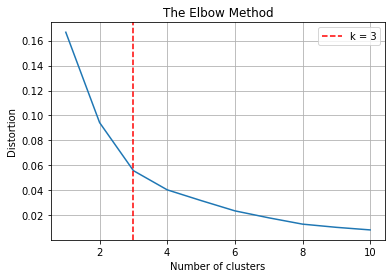

In [317]:
X = final_data[["Latitude","Longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [318]:
import scipy.cluster

In [319]:
k = 4
model = KMeans(n_clusters=k, init='k-means++')
X = final_data[["Latitude","Longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
final_data[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
final_data

<IPython.core.display.Javascript object>

E:\Anaconda\envs\py3env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,neighborhood,Latitude,Longitude,Total_Restaurant,Total_others,cluster,centroids
0,Aramane Nagara Ward,12.966180,77.586900,1,0,2,0
1,Banasavadi,13.013210,77.654460,1,0,0,0
2,Byatarayanapura,12.951940,77.544450,1,0,2,0
3,Chikkajala,13.168000,77.634110,0,1,1,1
4,Cox Town,12.995940,77.626440,0,1,0,1
5,Devanahalli taluk,12.967160,77.633400,1,0,0,0
6,Dr. Raj Kumar Ward,12.990975,77.557865,1,0,2,0
7,Gandhinagar,13.026430,77.617510,2,0,0,0
8,Ganga Nagar Ward,13.014450,77.588080,1,0,2,0
9,Gokula,13.040690,77.557260,1,0,2,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

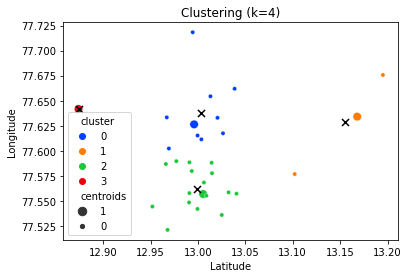

In [320]:
fig, ax = plt.subplots()
sns.scatterplot(x="Latitude", y="Longitude", data=final_data, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [321]:
model = cluster.AffinityPropagation()

NameError: name 'cluster' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Clustering (k=4)')

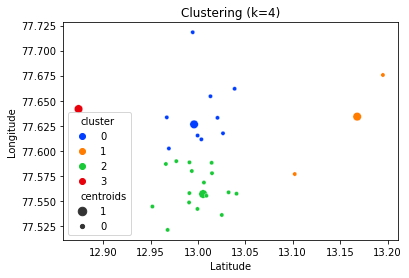

In [322]:
k = final_data["cluster"].nunique()
sns.scatterplot(x="Latitude", y="Longitude", data=final_data, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [323]:
from sklearn import preprocessing

In [324]:
x, y = "Latitude", "Longitude"
color = "cluster"
size = "Total_Restaurant"
popup = "neighborhood"
marker = "centroids"
location = [13.133521,77.567135]
data = final_data.copy()
## create color column
lst_elements = sorted(list(final_data[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=12)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(final_data[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.DivIcon(html=f"""
            <div><svg>
                <circle cx="25" cy="25" r="20" fill="#69b3a2" opacity=".4"/>
                <rect x="20", y="20" width="10" height="10", fill="white", opacity=".5" 
            </svg></div>""")
    ).add_to(map_), axis=1)
## plot the map
map_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [325]:
x, y = "Latitude", "Longitude"
color = "cluster"
size = "Total_others"
popup = "neighborhood"
marker = "centroids"
location = [12.9767936, 77.590082]
data = final_data.copy()
## create color column
lst_elements = sorted(list(final_data[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=12)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(final_data[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.DivIcon(html=f"""
            <div><svg>
                <circle cx="25" cy="25" r="20" fill="#69b3a2" opacity=".4"/>
                <rect x="20", y="20" width="10" height="10", fill="white", opacity=".5" 
            </svg></div>""")
    ).add_to(map_), axis=1)
## plot the map
map_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>